####  훈련용과 테스트용 데이터 준비

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.initializers import HeNormal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import os


c:\Users\KDP19\anaconda3\envs\mypython\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\KDP19\anaconda3\envs\mypython\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\KDP19\anaconda3\envs\mypython\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# label_file='all.csv'
# label=pd.read_csv(label_file)
# label = label.drop('Unnamed: 0', axis=1)
# print(label['age'].value_counts())
# label

In [3]:

# label = pd.get_dummies(label['age']).astype(int)
# label=label.to_numpy()
# label

In [4]:
# combined_data = np.load('all_32.npy')

In [5]:

# train_x, test_x, train_y, test_y = train_test_split(combined_data, 
#                                                     label, 
#                                                     stratify=label, 
#                                                     random_state=777)

In [6]:
# np.save('train_x.npy',train_x)
# np.save('test_x.npy',test_x)
# np.save('train_y.npy',train_y)
# np.save('test_y.npy',test_y)

In [9]:
train_x=np.load('train_x_resized2.npy')
test_x=np.load('test_x_resized2.npy')
train_y=np.load('train_y.npy')
test_y=np.load('test_y.npy')

In [10]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((16872, 100, 75, 3), (5624, 100, 75, 3), (16872, 4), (5624, 4))

In [4]:
# import tensorflow as tf
# train_x_resized2 = tf.image.resize(train_x, (100, 75))
# np.save('train_x_resized2.npy',train_x_resized2)

In [5]:
# test_x_resized2 = tf.image.resize(test_x, (100, 75))
# np.save('test_x_resized2.npy',test_x_resized2)

#### 모델 설계 :

- 입력층의 입력 데이터 형태 :  
- 출력층의 노드/유닛/커널/뉴런 갯수 지정 : 

In [23]:
he=HeNormal(seed=100)
model=Sequential()
model.add(Conv2D(16,3,input_shape=(100,75,3),padding= "same"))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(16,3,padding= "same"))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Flatten())


model.add(Dense(16,kernel_initializer=he))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16,kernel_initializer=he))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 75, 16)       448       
                                                                 
 activation_8 (Activation)   (None, 100, 75, 16)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 37, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 37, 16)        2320      
                                                                 
 activation_9 (Activation)   (None, 50, 37, 16)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 18, 16)        0         
 g2D)                                                 

In [24]:


model_path='./models/'
# 폴더 생성 함수
def file_check(file_path): 
    if os.path.exists(file_path) : 
        print(f"[{file_path}] 파일이 존재합니다.")
    else :
        print(f"[{file_path}] 파일이 존재하지 않습니다. \n저장 폴더를 생성합니다.")
        os.makedirs(file_path)
        print('저장 폴더 생성 완료')

file_check(model_path)

[./models/] 파일이 존재합니다.


In [25]:
# 객체 생성
model_file=model_path+'model_.hdf5' # {epoch:03} => epoch의 횟수를 파일명으로 저장

# 기본값 : val_loss (기준) => 낮아지면 저장. 이름을 epoch로 지정해서 파일이 계속 생성됨. 
# 이름을 똑같이 하면 마지막에 1개의 파일만 남음
    
mc_CB=ModelCheckpoint(model_file,
                    save_best_only=True) # 가장 좋은 모델만 저장  

# 조기종료 기준 : val_loss가 3 epochs 동안 감소되지 않으면 종료
es_CB=EarlyStopping(patience=3)



In [26]:
model.compile(optimizer='nadam',loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
result=model.fit(train_x, train_y, 
          epochs=1000,
          batch_size=32,
          validation_split=0.2,
          callbacks=[mc_CB, es_CB])

Epoch 1/1000
422/422 [==============================] - 22s 50ms/step - loss: 1.3492 - accuracy: 0.3191 - val_loss: 1.3443 - val_accuracy: 0.3159
Epoch 2/1000
422/422 [==============================] - 25s 59ms/step - loss: 1.3466 - accuracy: 0.3217 - val_loss: 1.3447 - val_accuracy: 0.3159
Epoch 3/1000
422/422 [==============================] - 25s 59ms/step - loss: 1.3450 - accuracy: 0.3218 - val_loss: 1.3447 - val_accuracy: 0.3159
Epoch 4/1000
422/422 [==============================] - 26s 61ms/step - loss: 1.3418 - accuracy: 0.3217 - val_loss: 1.3477 - val_accuracy: 0.3159


In [28]:
model.evaluate(test_x,test_y)

176/176 [==============================] - 3s 15ms/step - loss: 1.3494 - accuracy: 0.3206


[1.349447250366211, 0.3205903172492981]

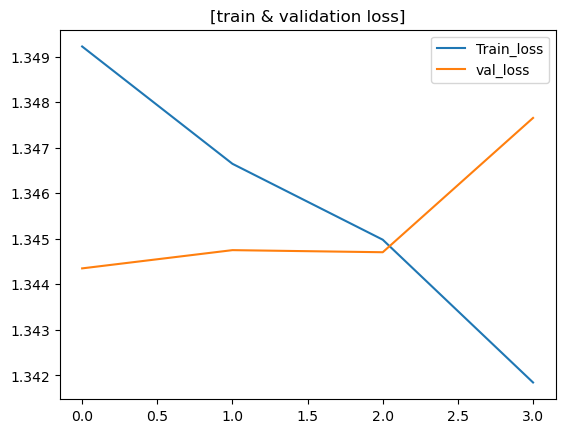

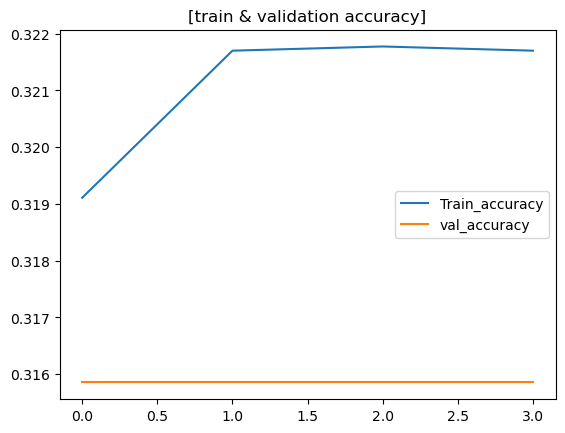

In [29]:
## 학습 결과에 대한 시각화


plt.plot(result.history['loss'],label='Train_loss')
plt.plot(result.history['val_loss'],label='val_loss')
plt.title('[train & validation loss]')
plt.legend()
plt.show()

plt.plot(result.history['accuracy'],label='Train_accuracy')
plt.plot(result.history['val_accuracy'],label='val_accuracy')
plt.title('[train & validation accuracy]')
plt.legend()
plt.show()

In [30]:
import autokeras as ak

# 이미지 분류기 생성
clf = ak.ImageClassifier(max_trials=10)  # max_trials는 시도할 모델의 수를 정의합니다.

# 데이터 로드 및 전처리


# 모델 학습
clf.fit(train_x, train_y, epochs=1000)

# 성능 평가
print('Accuracy: {accuracy}'.format(accuracy=clf.evaluate(test_x, test_y)))

Trial 1 Complete [00h 31m 05s]
val_loss: 1.3527686595916748

Best val_loss So Far: 1.3527686595916748
Total elapsed time: 00h 31m 05s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
resnet            |vanilla           |image_block_1/block_type
True              |True              |image_block_1/normalize
True              |False             |image_block_1/augment
True              |None              |image_block_1/image_augmentation_1/horizontal_flip
True              |None              |image_block_1/image_augmentation_1/vertical_flip
0                 |None              |image_block_1/image_augmentation_1/contrast_factor
0                 |None              |image_block_1/image_augmentation_1/rotation_factor
0.1               |None              |image_block_1/image_augmentation_1/translation_factor
0                 |None              |image_block_1/image_augmentation_1/zoom_factor
False             |None              |image_block_1/res_net_block_1/pr